In [ ]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "./Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler

features = df_market_data[['price_change_percentage_24h', 'price_change_percentage_7d']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['price_change_percentage_24h', 'price_change_percentage_7d'],
                         index=df_market_data.index)


In [8]:
# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, 
                         columns=['price_change_percentage_24h', 'price_change_percentage_7d'],
                         index=df_market_data.index)

# Copy the crypto names from the original DataFrame
scaled_df['coin_id'] = df_market_data.index

# Set the coin_id column as index
scaled_df.set_index('coin_id', inplace=True)

# Display the scaled DataFrame
scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d
coin_id,,
bitcoin,0.508529,0.493193
ethereum,0.185446,0.934445
tether,0.021774,-0.706337
ripple,-0.040764,-0.810928
bitcoin-cash,1.193036,2.000959


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [9]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [10]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `scaled_df`
# 3. Append the model.inertia_ to the inertia list
from sklearn.cluster import KMeans

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)



c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [11]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


<Axes: title={'center': 'Elbow Curve for Optimal k'}, xlabel='k'>

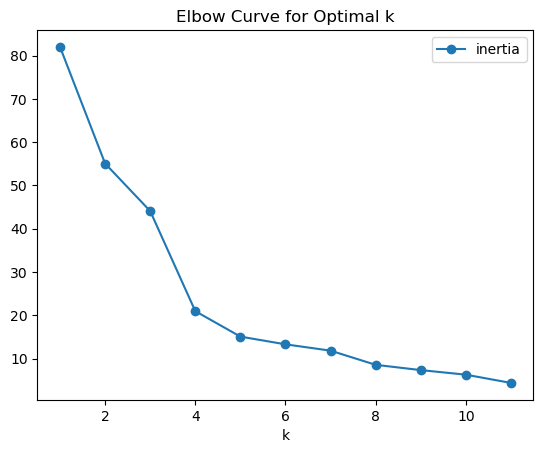

In [12]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k', y='inertia', title='Elbow Curve for Optimal k', marker='o')


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:**  4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [26]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=42)

In [27]:
# Fit the K-Means model using the scaled DataFrame
kmeans_model.fit(scaled_df)

c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [28]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = kmeans_model.predict(scaled_df)

# Print the resulting array of cluster values.
print(predicted_clusters)


[0 0 1 1 2 2 2 2 0 1 1 1 1 2 0 0 1 1 2 1 1 0 1 1 1 1 0 1 0 1 0 1 3 0 0 2 1
 1 0 1 1]


In [29]:
# Create a copy of the scaled DataFrame
clustered_df = scaled_df.copy()

In [30]:
# Add a new column to the copy of the scaled DataFrame with the predicted clusters
clustered_df['cluster'] = predicted_clusters

# Display the copy of the scaled DataFrame
clustered_df.head()



,price_change_percentage_24h,price_change_percentage_7d,cluster
coin_id,,,
bitcoin,0.508529,0.493193,0
ethereum,0.185446,0.934445,0
tether,0.021774,-0.706337,1
ripple,-0.040764,-0.810928,1
bitcoin-cash,1.193036,2.000959,2


In [31]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas

clustered_df.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="cluster",
    hover_cols=["coin_id"],
    title="Crypto Clusters by 24h and 7d Price Change"
)



:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [36]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [37]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
# down to three principal components.
pca_data = pca.fit_transform(scaled_df)

# View the scaled PCA data
print(pca_data[:4])



[[ 0.70832473  0.0108444 ]
 [ 0.79188247 -0.52962238]
 [-0.48405906  0.51485209]
 [-0.60223751  0.54458796]]


In [38]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print("Explained variance ratio:", explained_variance)
print("Total explained variance:", explained_variance.sum())



Explained variance ratio: [0.58482974 0.41517026]
Total explained variance: 1.0


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 1.0

In [39]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

# Copy the crypto names from the original scaled DataFrame
pca_df['coin_id'] = scaled_df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display the scaled PCA DataFrame
pca_df.head()



,PC1,PC2
coin_id,,
bitcoin,0.708325,0.010844
ethereum,0.791882,-0.529622
tether,-0.484059,0.514852
ripple,-0.602238,0.544588
bitcoin-cash,2.258496,-0.571288


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [40]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [41]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `pca_df`
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(pca_df)
    inertia_pca.append(model.inertia_)



c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [42]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {
    "k": k_values_pca,
    "inertia": inertia_pca
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


<Axes: title={'center': 'Elbow Curve (PCA Data)'}, xlabel='k'>

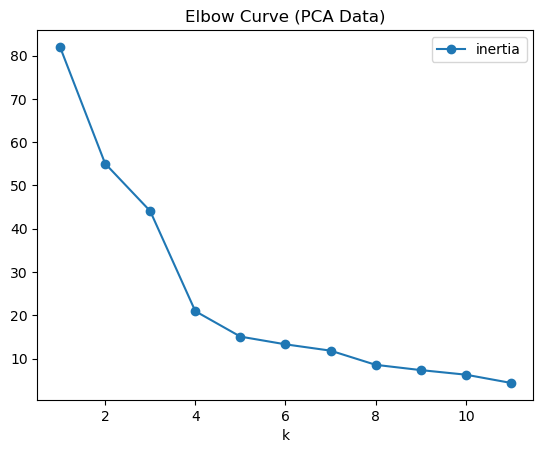

In [43]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_df_pca.plot.line(x='k', y='inertia', title='Elbow Curve (PCA Data)', marker='o')

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Not really


### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [44]:

# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=42)


In [46]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_df)


c:\Users\susov\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [47]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
pca_clusters = kmeans_pca.predict(pca_df)

# Print the resulting array of cluster values.
print(pca_clusters)


[0 0 1 1 2 2 2 2 0 1 1 1 1 2 0 0 1 1 2 1 1 0 1 1 1 1 0 1 0 1 0 1 3 0 0 2 1
 1 0 1 1]


In [48]:
# Create a copy of the scaled PCA DataFrame
clustered_pca_df = pca_df.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
clustered_pca_df['cluster'] = pca_clusters

# Display the copy of the scaled PCA DataFrame
clustered_pca_df.head()



,PC1,PC2,cluster
coin_id,,,
bitcoin,0.708325,0.010844,0
ethereum,0.791882,-0.529622,0
tether,-0.484059,0.514852,1
ripple,-0.602238,0.544588,1
bitcoin-cash,2.258496,-0.571288,2


In [49]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.

import hvplot.pandas

clustered_pca_df.hvplot.scatter(
    x='PC1',
    y='PC2',
    by='cluster',
    hover_cols=['coin_id'],
    title='Crypto Clusters (PCA Reduced)'
)



:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [51]:
# Create line plots without unsupported keyword arguments
elbow_plot_original = elbow_df.hvplot.line(x='k', y='inertia', title='Elbow Curve (Original Data)')
elbow_plot_pca = elbow_df_pca.hvplot.line(x='k', y='inertia', title='Elbow Curve (PCA Data)')

# Composite display of both elbow curves
elbow_plot_original + elbow_plot_pca



:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reduced noise / redunancy